# **1. 동영상 데이터**
컴퓨터 비전에서 동영상 데이터는 연속된 이미지 프레임들의 집합으로, 단순히 공간적 정보(픽셀, 객체의 위치, 형태 등)뿐만 아니라 시간에 따른 변화(움직임, 동작, 상호작용)를 함께 포함한다는 점에서 정적인 이미지와 구별됩니다. 이러한 시공간적 특성을 활용하여 객체 추적, 행동 인식, 장면 이해, 비디오 요약 등의 다양한 응용이 가능하며, 처리 과정에서는 프레임 간 상관관계와 움직임 정보를 효과적으로 추출하는 것이 핵심 과제입니다.

<img src="https://blog.kakaocdn.net/dna/bDCyJM/btsQlfempCe/AAAAAAAAAAAAAAAAAAAAAHyMa0boTh-wyNNGeVuPhVsWJ9Kt2_xnk3VfOWrzpq10/img.png?credential=yqXZFxpELC7KVnFOS48ylbz2pIh7yKj8&expires=1759244399&allow_ip=&allow_referer=&signature=Rl7Sh%2FgXCLczGmgiPdRjBdW4doU%3D">

# **2. 동영상 분석 기법**

### 1. 시계열 분석 (3D CNN)

시계열 분석에서 사용하는 3D CNN은 동영상 데이터를 단순히 독립된 이미지 프레임으로 보지 않고, 공간(가로·세로) + 시간 축(프레임 순서)을 함께 고려하여 특징을 추출하는 방법입니다. 즉, 2D CNN이 한 장의 이미지에서 주변 픽셀 간의 상관관계를 분석하는 것과 달리, 3D CNN은 연속된 여러 프레임을 동시에 입력으로 받아 움직임, 변화, 흐름과 같은 시간적 패턴까지 학습할 수 있습니다. 이러한 특성 덕분에 사람의 행동 인식, 제스처 분석, 스포츠 장면 분석처럼 동영상의 연속성과 동작 맥락이 중요한 문제에서 효과적으로 활용됩니다.

### 2. 이미지 합성 (2D CNN 변형)
이미지 합성(2D CNN 변형) 기법은 동영상의 모든 프레임을 시간 축으로 직접 처리하지 않고, 여러 장의 프레임을 하나의 이미지로 합쳐 2D CNN으로 분석하는 방식입니다. 예를 들어, N개의 연속된 프레임을 채널 단위로 이어 붙여 입력하면 기존 RGB(3채널) 대신 N채널 이미지를 구성할 수 있으며, 이를 통해 CNN이 공간적 특징을 추출하면서 제한적으로 시간적 변화를 반영하게 됩니다. 이 방법은 3D CNN에 비해 연산량과 메모리 사용이 크게 줄어들어 효율적이며, 시간적 흐름보다 정적인 장면 정보가 중요한 경우 유리하지만, 프레임 간의 세밀한 움직임이나 시계열적 맥락을 충분히 반영하지 못한다는 한계가 있습니다.

### 3. Attention 기법
Attention 기법을 활용한 동영상 처리는 모든 프레임을 동일하게 다루는 대신, 각 프레임의 중요도를 학습하여 가중치를 다르게 부여하는 방식입니다. 즉, 동영상 전체 길이 중에서 특정 순간이 전체 의미나 분류 결과를 크게 좌우할 수 있는데, Attention은 이런 중요한 프레임에 더 많은 비중을 두어 분석합니다. 이 과정에서 모델은 각 프레임에서 추출된 특징들을 종합하고, 의미 있는 프레임은 강조하고 덜 중요한 프레임은 억제하여 최종적인 표현을 생성합니다. 이러한 방식은 긴 동영상에서도 핵심 장면을 효과적으로 포착할 수 있어, 행동 인식, 영상 요약, 이상행동 탐지 같은 응용에 특히 강력하게 활용됩니다.

# **3. WLASL(World-Level American Sign Language) 데이터셋**
<a href="https://www.kaggle.com/datasets/risangbaskoro/wlasl-processed">WLASL(World-Level American Sign Language) 데이터셋</a>은 미국 수화를 단어 단위로 인식하기 위한 대규모 비디오 데이터셋으로, 수화 동작이 담긴 짧은 영상 클립들을 포함하고 있습니다. 이 데이터셋은 동일한 단어를 다양한 수화 사용자들이 수행한 영상을 제공하여 표현 방식의 다양성을 반영하며, 시계열적 동작과 손 모양, 움직임, 얼굴 표정 등 복합적인 비주얼 특징을 학습할 수 있도록 구성되어 있습니다. 따라서 WLASL은 수화 인식 모델, 제스처 인식, 비디오 기반 행동 인식 연구에 널리 활용되며, 실제 수화 번역 시스템이나 청각장애인을 위한 보조 기술 개발의 핵심 자원으로 쓰입니다.

In [1]:
from google.colab import files
files.upload()  # kaggle.json 업로드 창 표시
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
#!/bin/bash
!kaggle datasets download risangbaskoro/wlasl-processed

Dataset URL: https://www.kaggle.com/datasets/risangbaskoro/wlasl-processed
License(s): other
100% 4.81G/4.82G [01:10<00:00, 141MB/s]
100% 4.82G/4.82G [01:10<00:00, 73.6MB/s]


In [3]:
!unzip -q wlasl-processed.zip

In [4]:
import json
import os
import shutil
from PIL import Image
from tqdm import tqdm
import json

In [5]:
data_root = '.'
annotation_filename = 'WLASL_v0.3.json'

video_dir = os.path.join(data_root, 'videos')

with open(os.path.join(data_root, annotation_filename), 'r')as json_f:
    annotations = json.load(json_f)
annotations[:2]

[{'gloss': 'book',
  'instances': [{'bbox': [385, 37, 885, 720],
    'fps': 25,
    'frame_end': -1,
    'frame_start': 1,
    'instance_id': 0,
    'signer_id': 118,
    'source': 'aslbrick',
    'split': 'train',
    'url': 'http://aslbricks.org/New/ASL-Videos/book.mp4',
    'variation_id': 0,
    'video_id': '69241'},
   {'bbox': [190, 25, 489, 370],
    'fps': 25,
    'frame_end': -1,
    'frame_start': 1,
    'instance_id': 1,
    'signer_id': 90,
    'source': 'aslsignbank',
    'split': 'train',
    'url': 'https://aslsignbank.haskins.yale.edu/dictionary/protected_media/glossvideo/ASL/BO/BOOK-418.mp4',
    'variation_id': 0,
    'video_id': '65225'},
   {'bbox': [262, 1, 652, 480],
    'fps': 25,
    'frame_end': -1,
    'frame_start': 1,
    'instance_id': 2,
    'signer_id': 110,
    'source': 'valencia-asl',
    'split': 'train',
    'url': 'https://www.youtube.com/watch?v=0UsjUE-TXns',
    'variation_id': 0,
    'video_id': '68011'},
   {'bbox': [123, 19, 516, 358],
    'fps

In [6]:
from collections import defaultdict

class_map = defaultdict(int)
for annot in annotations:
    cls_cnt = 0
    instances = annot['instances']
    for instance in instances:
        video_filename = f"{instance['video_id']}.mp4"
        video_path = os.path.join(video_dir, video_filename)

        if not os.path.exists(video_path):
            continue
        else:
            cls_cnt += 1

    class_map[annot['gloss']] += cls_cnt

class_list = []
class_cnt = []
for k, v in class_map.items():
    class_list.append(k)
    class_cnt.append(v)
    print(f'Class {k} counts : {v}')

Class book counts : 6
Class drink counts : 15
Class computer counts : 14
Class before counts : 16
Class chair counts : 7
Class go counts : 15
Class clothes counts : 5
Class who counts : 14
Class candy counts : 13
Class cousin counts : 14
Class deaf counts : 11
Class fine counts : 9
Class help counts : 14
Class no counts : 11
Class thin counts : 16
Class walk counts : 11
Class year counts : 10
Class yes counts : 12
Class all counts : 8
Class black counts : 10
Class cool counts : 16
Class finish counts : 9
Class hot counts : 10
Class like counts : 10
Class many counts : 10
Class mother counts : 11
Class now counts : 9
Class orange counts : 10
Class table counts : 5
Class thanksgiving counts : 13
Class what counts : 12
Class woman counts : 11
Class bed counts : 13
Class blue counts : 8
Class bowling counts : 13
Class can counts : 9
Class dog counts : 11
Class family counts : 11
Class fish counts : 10
Class graduate counts : 10
Class hat counts : 9
Class hearing counts : 8
Class kiss count

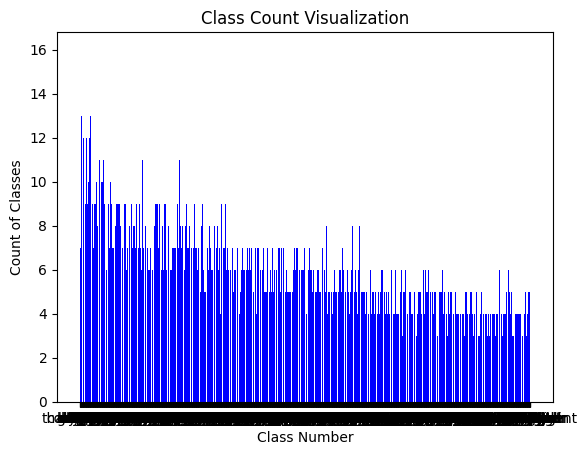

In [7]:
import matplotlib.pyplot as plt

plt.bar(class_list, class_cnt, color='blue')

plt.title('Class Count Visualization')
plt.xlabel('Class Number')
plt.ylabel('Count of Classes')
plt.show()

In [8]:
max_cnt = 14
new_annotations = []
class_list = []
class_cnt = []
for annot in annotations:
    cls_cnt = class_map[annot['gloss']]

    if cls_cnt < max_cnt:
        continue
    else:
        class_list.append(annot['gloss'])
        class_cnt.append(cls_cnt)
        for instance in annot['instances']:
            video_filename = f"{instance['video_id']}.mp4"
            video_path = os.path.join(video_dir, video_filename)

            if not os.path.exists(video_path):
                continue

            new_annotations.append(
                {
                    'filename' : f"{instance['video_id']}.mp4",
                    'label': annot['gloss'],
                    'split': instance['split']
                }
            )

print(new_annotations[:3])
print(f"데이터 개수 : {len(new_annotations)}")
print(f"클래스 개수 : {len(class_list)}")
print(f"클래스 목록 : {class_list}")

[{'filename': '69302.mp4', 'label': 'drink', 'split': 'val'}, {'filename': '65539.mp4', 'label': 'drink', 'split': 'train'}, {'filename': '17710.mp4', 'label': 'drink', 'split': 'train'}]
데이터 개수 : 134
클래스 개수 : 9
클래스 목록 : ['drink', 'computer', 'before', 'go', 'who', 'cousin', 'help', 'thin', 'cool']


In [9]:
annotations = new_annotations

In [10]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
from PIL import Image
import cv2
from PIL import Image
import numpy as np
import random

In [11]:
class VideoDataset(Dataset):
    def __init__(self,
                 video_root,
                 annotations,
                 class_list,
                 transform=None):
        self.video_root = video_root
        self.annotations = annotations
        self.transform = transform
        self.class_list = class_list # 클래스의 목록
        self.num_classes = len(self.class_list)

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):

        annot = self.annotations[idx]
        filename = annot['filename']
        label = annot['label']

        video_path = os.path.join(self.video_root, filename)
        cap = cv2.VideoCapture(video_path)
        num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

        num_to_select = 12
        if num_frames < num_to_select:
            max_frame_idx = num_frames - 1
            frame_idxs = [i for i in range(num_frames)]
            frame_idxs += [max_frame_idx for i in range(num_to_select - num_frames)]
        else:
            frame_idxs = np.sort(np.random.choice(num_frames, size=num_to_select, replace=False))


        frames = []
        for frame_idx in frame_idxs:
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
            ret, frame = cap.read()
            if ret:
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                frame = self._crop_to_square(frame)

            else:
                frame = Image.new('RGB', (224, 224), (0, 0, 0))
                frame = np.array(frame)
                # print('frame read error')
            if self.transform:
                frame = self.transform(image=frame)['image']

            frames.append(frame)

        cap.release()

        if self.transform:
            frames = torch.stack(frames)


        label = class_list.index(label)
        target = torch.tensor(label, dtype=torch.long)

        return frames, target

    def _crop_to_square(self, image):
        height, width = image.shape[:2]

        center_x, center_y = width // 2, height // 2

        if width > height:
            new_width = new_height = height
        else:
            new_width = new_height = width

        left_x = center_x - new_width // 2
        top_y = center_y - new_height // 2

        cropped_image = image[top_y:top_y + new_height, left_x:left_x + new_width]
        return cropped_image


In [12]:
import matplotlib.pyplot as plt

def draw_frames(images):
    fig, axs = plt.subplots(2, 6, figsize=(12, 6))

    for i, ax in enumerate(axs.flat):
        if i >= len(images):
            break
        ax.imshow(images[i])

    plt.tight_layout()
    plt.show()

In [13]:
dataset = VideoDataset(annotations=annotations, video_root=video_dir, class_list=class_list)
data = dataset[0]

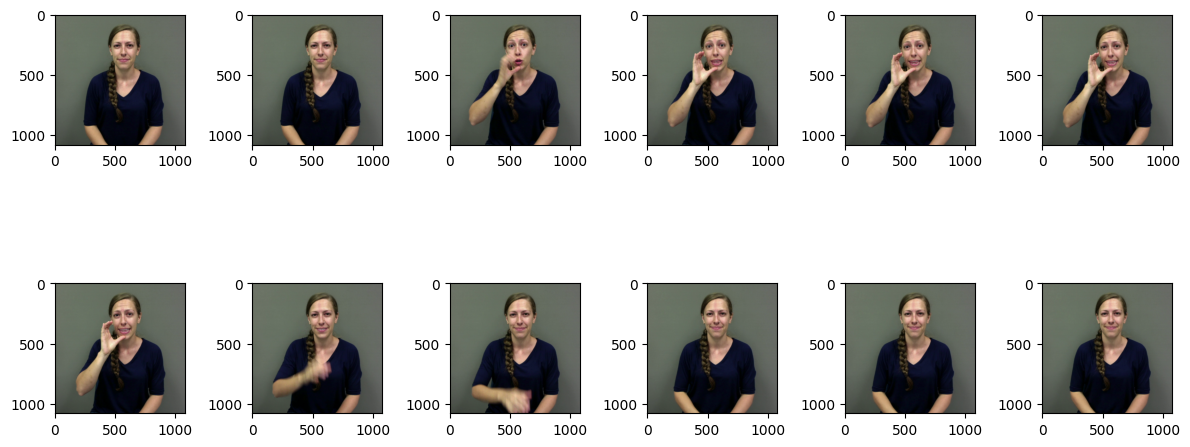

In [14]:
draw_frames(data[0])

In [15]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

def draw_images(images, classes):

    fig, axs = plt.subplots(2, 6, figsize=(12, 6))

    for i, ax in enumerate(axs.flat):
        if i >= len(images):
            break
        ax.imshow(images[i])
        ax.set_title(classes[i])

    plt.tight_layout()
    plt.show()

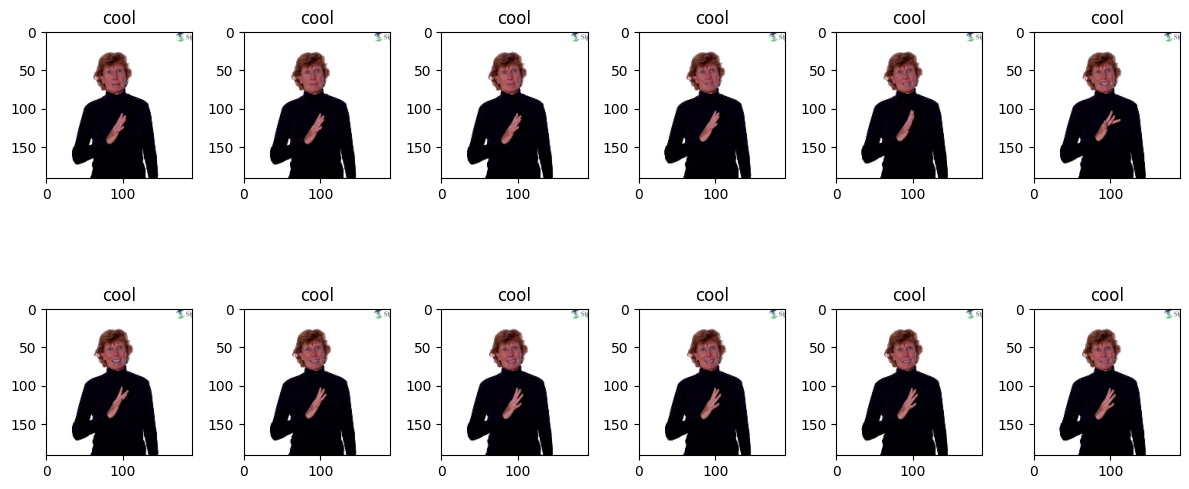

In [16]:
from PIL import Image
import numpy as np
import random
from glob import glob

random.shuffle(annotations)
dataset = VideoDataset(video_root=video_dir, annotations=annotations, class_list=class_list)

sample_images = []
sample_classes = []
sample_cnt = 0
max_cnt = 1

images, label = dataset[0]
label = class_list[int(label)]
label = [label for i in range(len(images))]

draw_images(images, label)

In [17]:
annotations[0]

{'filename': '13209.mp4', 'label': 'cool', 'split': 'train'}

In [18]:
random.shuffle(annotations)
train_annot = []
val_annot = []

val_cls_check = {}

for annot in annotations:
    if annot['label'] in val_cls_check:
        train_annot.append(annot)
        continue

    else:
        val_annot.append(annot)
        val_cls_check[annot['label']] = 1

print(f'학습 데이터 개수 : {len(train_annot)}')
print(f'검증 데이터 개수 : {len(val_annot)}')

학습 데이터 개수 : 125
검증 데이터 개수 : 9


In [19]:
hyper_params = {
    'num_epochs': 8,
    'lr': 0.0001,
    'image_size': 224,
    'train_batch_size': 12,
    'val_batch_size': 8,
    'print_preq': 0.1
}

In [20]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

sample_transform = A.Compose([
    # A.ShiftScaleRotate(rotate_limit=20, shift_limit=0.1, scale_limit=0.05, p=0.5, border_mode=0),
    # A.ColorJitter(p=0.5),
    # A.RandomBrightnessContrast(p=0.5),
    A.LongestMaxSize(max_size=hyper_params['image_size'],
                     always_apply=True),
    A.PadIfNeeded(min_height=hyper_params['image_size'],
                  min_width=hyper_params['image_size'],
                  always_apply=True,
                  border_mode=0),
    A.Normalize(p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

sample_dataset = VideoDataset(video_root=video_dir,
                              annotations=annotations,
                              class_list=class_list,
                              transform=sample_transform)

/tmp/ipython-input-254524184.py:8: UserWarning: Argument(s) 'always_apply' are not valid for transform MaxSizeTransform
  A.LongestMaxSize(max_size=hyper_params['image_size'],
/tmp/ipython-input-254524184.py:10: UserWarning: Argument(s) 'always_apply' are not valid for transform PadIfNeeded
  A.PadIfNeeded(min_height=hyper_params['image_size'],


In [21]:
import torch
from torchvision.transforms.functional import to_pil_image

def denormalize(tensor, mean, std):
    mean = torch.tensor(mean).reshape(-1, 1, 1)
    std = torch.tensor(std).reshape(-1, 1, 1)

    tensor = tensor * std + mean

    tensor = torch.clamp(tensor, 0, 1)

    return tensor

def tensor_to_pil(tensor, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)):
    tensor = denormalize(tensor, mean, std)

    pil_image = to_pil_image(tensor)

    return pil_image

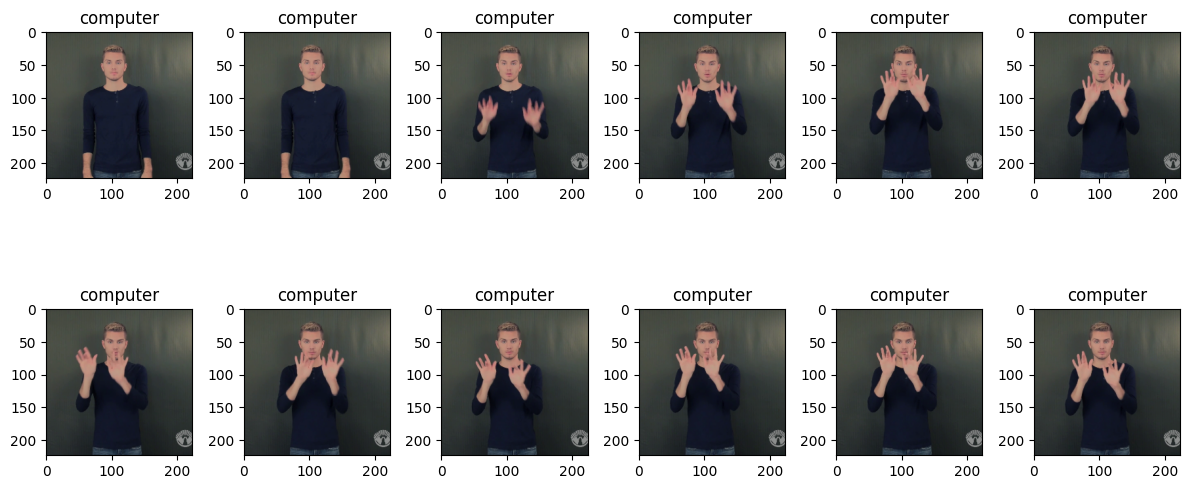

In [22]:
transformed_images = []
targets = []

max_cnt = 1
target_classes = []
class_list = sample_dataset.class_list
for idx, (images, target) in enumerate(sample_dataset):
    if idx == max_cnt:
        break
    for image in images:
        transformed_images.append(tensor_to_pil(image))
        target_classes.append(class_list[int(target)])

draw_images(transformed_images, target_classes)

In [24]:
train_transform = A.Compose([
    # A.ShiftScaleRotate(rotate_limit=20, shift_limit=0.1, scale_limit=0.05, p=0.5, border_mode=0),
    # A.ColorJitter(p=0.5),
    # A.RandomBrightnessContrast(p=0.5),
    A.LongestMaxSize(max_size=hyper_params['image_size']),
    A.PadIfNeeded(min_height=hyper_params['image_size'],
                  min_width=hyper_params['image_size'],
                  border_mode=0),
    A.Normalize(p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)), ## 이미지 픽셀 값 정규화
    ToTensorV2() ## 모델에 입력할 때 사용
])

val_transform = A.Compose([
    A.LongestMaxSize(max_size=hyper_params['image_size']),
    A.PadIfNeeded(min_height=hyper_params['image_size'],
                  min_width=hyper_params['image_size'],
                  border_mode=0),
    A.Normalize(p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

train_dataset = VideoDataset(video_root=video_dir,
                              annotations=train_annot,
                              class_list=class_list,
                              transform=train_transform)
train_dataloader = torch.utils.data.DataLoader(train_dataset, num_workers=2, batch_size=hyper_params['train_batch_size'], shuffle=True)

val_dataset = VideoDataset(video_root=video_dir,
                              annotations=val_annot,
                              class_list=class_list,
                              transform=val_transform)
val_dataloader = torch.utils.data.DataLoader(val_dataset, num_workers=2, batch_size=hyper_params['val_batch_size'], shuffle=True)

In [25]:
from torchvision import models
import torch.nn as nn

model = models.video.r3d_18(pretrained=True)
model.fc = nn.Linear(512, len(class_list))

model

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=R3D_18_Weights.KINETICS400_V1`. You can also use `weights=R3D_18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/r3d_18-b3b3357e.pth" to /root/.cache/torch/hub/checkpoints/r3d_18-b3b3357e.pth


100%|██████████| 127M/127M [00:00<00:00, 168MB/s]


VideoResNet(
  (stem): BasicStem(
    (0): Conv3d(3, 64, kernel_size=(3, 7, 7), stride=(1, 2, 2), padding=(1, 3, 3), bias=False)
    (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Sequential(
        (0): Conv3DSimple(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
        (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
      (conv2): Sequential(
        (0): Conv3DSimple(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
        (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (relu): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Sequential(
        (0): Conv3DSimple(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
        (1):

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim

def calculate_accuracy(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    correct = (y_pred == y_true)
    accuracy = correct.sum() / correct.size
    return accuracy

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=hyper_params['lr'])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = hyper_params['num_epochs']
model_save_dir = './WLASL_train_results'
os.makedirs(model_save_dir, exist_ok=True)

best_acc = 0.0
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    epoch_loss = 0.0
    print_every = max(1, int(len(train_dataloader) * hyper_params['print_preq']))

    for idx, (images, targets) in enumerate(train_dataloader):
        images, targets = images.to(device), targets.to(device)
        ### images : [배치, 프레임개수, 채널, 높이, 너비 ] => [배치, 채널, 프레임개수, 높이, 너비 ]
        images = images.permute(0, 2, 1, 3, 4)

        outputs = model(images)
        loss = criterion(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        epoch_loss += loss.item()

        if (idx + 1) % print_every == 0 or (idx + 1) == len(train_dataloader):
            window = (idx % print_every) + 1
            print(f"Epoch [{epoch+1}/{num_epochs}], "
                  f"Iter [{idx+1}/{len(train_dataloader)}] "
                  f"Loss: {running_loss / window:.4f}")
            running_loss = 0.0

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss/len(train_dataloader):.4f}")

    model.eval()
    y_true, y_pred = [], []
    val_loss_sum, val_n = 0.0, 0
    with torch.no_grad():
        for images, targets in val_dataloader:
            images, targets = images.to(device), targets.to(device)
            images = images.permute(0, 2, 1, 3, 4)
            outputs = model(images)
            val_loss_sum += criterion(outputs, targets).item() * targets.size(0)
            val_n += targets.size(0)
            _, preds = torch.max(outputs, 1)
            y_true.extend(targets.cpu().numpy().tolist())
            y_pred.extend(preds.cpu().numpy().tolist())
    acc = calculate_accuracy(y_true, y_pred)
    val_loss = val_loss_sum / max(val_n, 1)
    print(f"val_loss: {val_loss:.4f}  accuracy: {acc*100:.2f}")

    if acc > best_acc:
        model_save_path = os.path.join(model_save_dir, f'best_model.pth')
        torch.save(model.state_dict(), model_save_path)
        best_acc = acc

Epoch [1/8], Iter [1/11] Loss: 2.3273
Epoch [1/8], Iter [2/11] Loss: 2.1020
Epoch [1/8], Iter [3/11] Loss: 2.0762
Epoch [1/8], Iter [4/11] Loss: 2.4819
Epoch [1/8], Iter [5/11] Loss: 2.2761
Epoch [1/8], Iter [6/11] Loss: 2.2248
Epoch [1/8], Iter [7/11] Loss: 1.8876
Epoch [1/8], Iter [8/11] Loss: 2.2622
Epoch [1/8], Iter [9/11] Loss: 2.3399
Epoch [1/8], Iter [10/11] Loss: 2.3324
Epoch [1/8], Iter [11/11] Loss: 1.9385
Epoch [1/8], Loss: 2.2045
val_loss: 1.8576  accuracy: 22.22
Epoch [2/8], Iter [1/11] Loss: 1.5987
Epoch [2/8], Iter [2/11] Loss: 1.4738
Epoch [2/8], Iter [3/11] Loss: 1.4563
Epoch [2/8], Iter [4/11] Loss: 1.7715
Epoch [2/8], Iter [5/11] Loss: 1.5396
Epoch [2/8], Iter [6/11] Loss: 1.6060
Epoch [2/8], Iter [7/11] Loss: 1.6124
Epoch [2/8], Iter [8/11] Loss: 1.4477
Epoch [2/8], Iter [9/11] Loss: 1.4530
Epoch [2/8], Iter [10/11] Loss: 1.5029
Epoch [2/8], Iter [11/11] Loss: 2.0513
Epoch [2/8], Loss: 1.5921
val_loss: 1.4467  accuracy: 44.44
Epoch [3/8], Iter [1/11] Loss: 1.5200
Ep

In [27]:
weight_path = 'WLASL_train_results/best_model.pth'

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = models.video.r3d_18(pretrained=True)
model.fc = nn.Linear(512, len(class_list))
model.load_state_dict(torch.load(weight_path, map_location='cpu'))
model.to(device)

VideoResNet(
  (stem): BasicStem(
    (0): Conv3d(3, 64, kernel_size=(3, 7, 7), stride=(1, 2, 2), padding=(1, 3, 3), bias=False)
    (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Sequential(
        (0): Conv3DSimple(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
        (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
      (conv2): Sequential(
        (0): Conv3DSimple(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
        (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (relu): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Sequential(
        (0): Conv3DSimple(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
        (1):

In [28]:
def crop_to_square(image):
    height, width = image.shape[:2]

    # 이미지의 중심 좌표
    center_x, center_y = width // 2, height // 2

    if width > height:
        new_width = new_height = height
    else:
        new_width = new_height = width

    left_x = center_x - new_width // 2
    top_y = center_y - new_height // 2

    cropped_image = image[top_y:top_y + new_height, left_x:left_x + new_width]
    return cropped_image

In [29]:
import cv2
from glob import glob

video_path_list = list(glob(f"{video_dir}/*.mp4"))
video_path = random.sample(video_path_list, 1)[0]
cap = cv2.VideoCapture(video_path)
num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

frame_idxs = np.sort(np.random.choice(num_frames-4, size=12, replace=False))
frames = []
for frame_idx in frame_idxs:
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
    ret, frame = cap.read()
    if ret:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = crop_to_square(frame)

    else:
        frame = np.zeros((256, 256, 3))
        print('frame read error')
    frame = val_transform(image=frame)['image']

    frames.append(frame)
frames = torch.stack(frames)

In [30]:
frames.shape

torch.Size([12, 3, 224, 224])

In [31]:
model.eval()
with torch.no_grad():
    frames = frames.unsqueeze(0).permute(0, 2, 1, 3, 4)
    output = model(frames.to(device))
    # preds = F.softmax(output)[0].detach().cpu().numpy().tolist()
    preds = F.softmax(output, dim=1)[0].detach().cpu().numpy().tolist()

for pred, cls in zip(preds, class_list):
    print(f"{cls} : {pred*100:.2f}%")

drink : 10.50%
computer : 10.84%
before : 3.19%
go : 14.69%
who : 1.48%
cousin : 3.02%
help : 0.99%
thin : 45.88%
cool : 9.42%


In [ ]:
class VGG3D(nn.Modole):
    def __init__(self, num_classes=9):
        super(VGG3D, self).__init__()
        self.features = nn.Sequential(
            # 첫 번째 컨볼루션 블록
            nn.Conv3d(3, 64, kernel_size=(3, 3, 3), padding=1),
            nn.BatchNorm3d(64),
            nn.ReLU(inplace=True),
            nn.Conv3d(64, 64, kernel_size=3, padding=1, stride=2),
            nn.BatchNorm3d(64),
            nn.ReLU(inplace=True),
            # 두 번째 컨볼루션 블록
            nn.Conv3d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm3d(128),
            nn.ReLU(inplace=True),
            nn.Conv3d(128, 128, kernel_size=3, padding=1, stride=2),
            nn.BatchNorm3d(128),
            nn.ReLU(inplace=True),
            # 세 번째 컨볼루션 블록
            nn.Conv3d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm3d(256),
            nn.ReLU(inplace=True),
            nn.Conv3d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm3d(256),
            nn.ReLU(inplace=True),
            nn.Conv3d(256, 256, kernel_size=3, padding=1, stride=2),
            nn.BatchNorm3d(256),
            nn.ReLU(inplace=True),
            # 네 번째 컨볼루션 블록
            nn.Conv3d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm3d(512),
            nn.ReLU(inplace=True),
            nn.Conv3d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm3d(512),
            nn.ReLU(inplace=True),
            nn.Conv3d(512, 512, kernel_size=3, padding=1, stride=2),
            nn.BatchNorm3d(512),
            nn.ReLU(inplace=True),
            # 다섯 번째 컨볼루션 블록
            nn.Conv3d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm3d(512),
            nn.ReLU(inplace=True),
            nn.Conv3d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm3d(512),
            nn.ReLU(inplace=True),
            nn.Conv3d(512, 512, kernel_size=3, padding=1, stride=2),
            nn.BatchNorm3d(512),
            nn.ReLU(inplace=True),
        )

        self.adaptive_pool = nn.AdaptiveAvgPool3d((1,1,1))
        self.adaptive_pool = nn.Linear(512, num_classes)
        self.classifier = nn.Sequential(
            nn.Linear(512 * 2 * 2 * 2, 4096),
            nn.ReLU(True)
            nn.Dropouy(),
            mm.lo
        )